# lg segmentor2 test with 2 training volumes

Training volumes are cropped from original 256 to 128 cube sizes, to run this faster

In [1]:
import leopardgecko.segmentor2 as lgs2
import numpy as np

In [2]:
import logging
#logging.basicConfig(level=logging.INFO)
logging.basicConfig(level=logging.INFO,
                    format="%(asctime)s — %(name)s — %(levelname)s — %(funcName)s:%(lineno)d — %(message)s",
        )
import tifffile

In [3]:
data_labels_fn = ("./test_data/TS_0005_crop.tif", "./test_data/TS_0005_ribos_membr_crop.tif")

datafn0, labelfn0 =data_labels_fn

data = tifffile.imread(datafn0)
labels = tifffile.imread(labelfn0)

# traindatas=[data, data]
# trainlabels=[labels, labels]

# 2 non-intersecting volumes
data_128crop_orig = data[:128,:128,:128]
label_128crop_orig = labels[:128,:128,:128]

data_128crop_other = data[128:,:128,:128]
label_128crop_other = labels[128:,:128,:128]

# traindatas=[data_128crop_orig, data_128crop_orig]
# trainlabels=[label_128crop_orig, label_128crop_orig]
traindatas=[data_128crop_orig, data_128crop_other]
trainlabels=[label_128crop_orig, label_128crop_other]

In [4]:
lgs2.nn1_train_epochs=3 # debug low number
lgs2.nn2_train_epochs=3

In [5]:
#lgs2.quick_new_and_train_one_unet_model_per_axis(traindatas, trainlabels)

lgs2.quick_new_and_train_2unets_z_xy_models(traindatas, trainlabels)

2024-06-29 21:05:10,326 — root — INFO — quick_new_and_train_2unets_z_xy_models:1532 — quick_new_and_train_one_unet_model_per_axis
2024-06-29 21:05:10,335 — root — INFO — update_nn1_models_from_generators:173 — update_NN1_models_from_generators()
2024-06-29 21:05:10,336 — root — INFO — update_nn1_models_from_generators:178 — 2 NN1 models to be created
2024-06-29 21:05:10,337 — root — INFO — create_nn1_ptmodel_from_class_generator:125 — create_nn1_ptmodel_from_class_generator()
2024-06-29 21:05:11,153 — root — INFO — create_nn1_ptmodel_from_class_generator:125 — create_nn1_ptmodel_from_class_generator()
2024-06-29 21:05:11,686 — root — INFO — update_nn2_model_from_generator:979 — update_NN2_model_from_generator()
2024-06-29 21:05:11,686 — root — INFO — create_nn2_ptmodel_from_class_generator:946 — create_nn2_ptmodel_from_class_generator()
2024-06-29 21:05:11,686 — root — INFO — create_nn2_ptmodel_from_class_generator:954 — hid_layers_num_list: [10, 10]
2024-06-29 21:05:11,686 — root — IN

Save model

In [6]:
import datetime
DATE=str(datetime.date.today())
TIME=f"{datetime.datetime.now().hour:02d}{datetime.datetime.now().minute:02d}"
fname_stem=f"{DATE}_{TIME}"
model_fn = f"{fname_stem}_model.lgsegm2"
model_fn

'2024-06-29_2106_model.lgsegm2'

In [7]:
lgs2.save_lgsegm2_model(model_fn)

## see training progress

In [8]:
lgs2.last_train_nn1_progress

{0: {'test_results': [{'avg_loss': 0.7025525925251154,
    'avg_metric': 0.09146822415982761,
    'test_metrics': [3.051757848163139e-12,
     0.1055908203125,
     0.232391357421875,
     0.178741455078125,
     0.085968017578125,
     0.070953369140625,
     0.0361328125,
     0.241851806640625,
     0.11572265625,
     0.126434326171875,
     3.051757848163139e-12,
     0.150299072265625,
     3.051757848163139e-12,
     0.111846923828125,
     3.051757848163139e-12,
     0.005096435546875,
     0.157470703125,
     3.051757848163139e-12,
     3.051757848163139e-12,
     3.051757848163139e-12,
     0.181549072265625,
     0.22442626953125,
     0.246185302734375,
     0.107513427734375,
     3.051757848163139e-12,
     6.103515696326278e-12],
    'test_losses': [0.3333333432674408,
     0.9646962881088257,
     0.8629740476608276,
     0.9099790453910828,
     0.9753705859184265,
     0.9369516372680664,
     0.616976261138916,
     0.9167348146438599,
     0.9449765086174011,
     

In [9]:
for k,v in lgs2.last_train_nn1_progress.items():
    print(k,v)

0 {'test_results': [{'avg_loss': 0.7025525925251154, 'avg_metric': 0.09146822415982761, 'test_metrics': [3.051757848163139e-12, 0.1055908203125, 0.232391357421875, 0.178741455078125, 0.085968017578125, 0.070953369140625, 0.0361328125, 0.241851806640625, 0.11572265625, 0.126434326171875, 3.051757848163139e-12, 0.150299072265625, 3.051757848163139e-12, 0.111846923828125, 3.051757848163139e-12, 0.005096435546875, 0.157470703125, 3.051757848163139e-12, 3.051757848163139e-12, 3.051757848163139e-12, 0.181549072265625, 0.22442626953125, 0.246185302734375, 0.107513427734375, 3.051757848163139e-12, 6.103515696326278e-12], 'test_losses': [0.3333333432674408, 0.9646962881088257, 0.8629740476608276, 0.9099790453910828, 0.9753705859184265, 0.9369516372680664, 0.616976261138916, 0.9167348146438599, 0.9449765086174011, 0.9224584102630615, 0.3333333432674408, 0.9446791410446167, 0.3333333432674408, 0.9723477363586426, 0.3333333432674408, 0.6623477935791016, 0.9547135233879089, 0.3333333432674408, 0.33

In [10]:
for k,v in lgs2.last_train_nn1_progress.items():
    print(k,v['test_results'])
    print(len(v['test_results']))

0 [{'avg_loss': 0.7025525925251154, 'avg_metric': 0.09146822415982761, 'test_metrics': [3.051757848163139e-12, 0.1055908203125, 0.232391357421875, 0.178741455078125, 0.085968017578125, 0.070953369140625, 0.0361328125, 0.241851806640625, 0.11572265625, 0.126434326171875, 3.051757848163139e-12, 0.150299072265625, 3.051757848163139e-12, 0.111846923828125, 3.051757848163139e-12, 0.005096435546875, 0.157470703125, 3.051757848163139e-12, 3.051757848163139e-12, 3.051757848163139e-12, 0.181549072265625, 0.22442626953125, 0.246185302734375, 0.107513427734375, 3.051757848163139e-12, 6.103515696326278e-12], 'test_losses': [0.3333333432674408, 0.9646962881088257, 0.8629740476608276, 0.9099790453910828, 0.9753705859184265, 0.9369516372680664, 0.616976261138916, 0.9167348146438599, 0.9449765086174011, 0.9224584102630615, 0.3333333432674408, 0.9446791410446167, 0.3333333432674408, 0.9723477363586426, 0.3333333432674408, 0.6623477935791016, 0.9547135233879089, 0.3333333432674408, 0.3333333432674408, 0

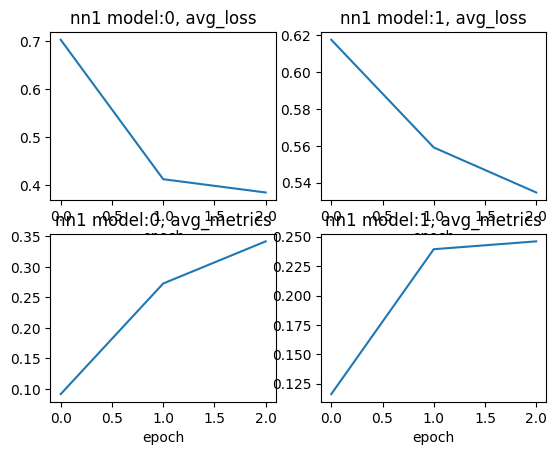

In [11]:
import matplotlib.pyplot as plt

nmodels = len(lgs2.last_train_nn1_progress.keys())

fig, axs= plt.subplots(2,2)
for k,v in lgs2.last_train_nn1_progress.items():

    avg_loss = [ t['avg_loss'] for t in v['test_results']]
    avg_metrics = [ t['avg_metric'] for t in v['test_results']]
    axs[0,k].plot( avg_loss)
    axs[0,k].set_title(f"nn1 model:{k}, avg_loss")
    axs[0,k].set_xlabel("epoch")
    axs[1,k].plot(avg_metrics)
    axs[1,k].set_title(f"nn1 model:{k}, avg_metrics")
    axs[1,k].set_xlabel("epoch")

In [12]:
lgs2.last_train_nn2_progress

{'test_results': [{'avg_loss': 0.22327224537730217,
   'avg_metric': 0.9484100341796875,
   'test_metrics': [0.947998046875,
    0.94970703125,
    0.955078125,
    0.943359375,
    0.9501953125,
    0.947509765625,
    0.952392578125,
    0.951904296875,
    0.94482421875,
    0.94873046875,
    0.94287109375,
    0.951171875,
    0.9541015625,
    0.9423828125,
    0.9443359375,
    0.947998046875],
   'test_losses': [0.23173460364341736,
    0.212419331073761,
    0.20590640604496002,
    0.24399371445178986,
    0.21943247318267822,
    0.22638945281505585,
    0.21150298416614532,
    0.2096807360649109,
    0.2311123013496399,
    0.2194097340106964,
    0.23987700045108795,
    0.21126660704612732,
    0.2057143747806549,
    0.24050982296466827,
    0.23656561970710754,
    0.2268407642841339]},
  {'avg_loss': 0.22515651118010283,
   'avg_metric': 0.948333740234375,
   'test_metrics': [0.9482421875,
    0.95166015625,
    0.943115234375,
    0.94580078125,
    0.949951171875,
 

Text(0.5, 0, 'epoch')

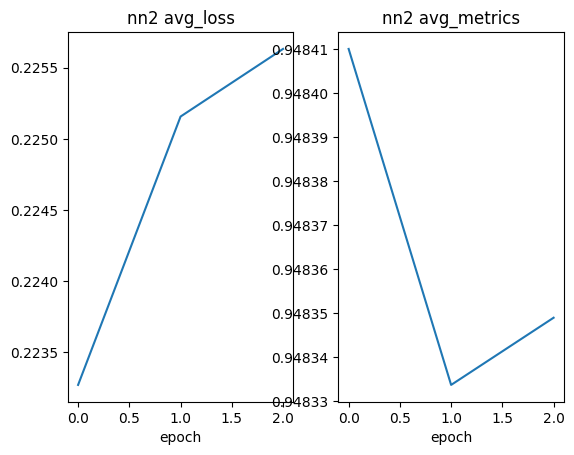

In [13]:
import matplotlib.pyplot as plt

nmodels = len(lgs2.last_train_nn1_progress.keys())
fig, axs= plt.subplots(1,2)

v=lgs2.last_train_nn2_progress

avg_loss = [ t['avg_loss'] for t in v['test_results']]
avg_metrics = [ t['avg_metric'] for t in v['test_results']]
axs[0].plot( avg_loss)
axs[0].set_title(f"nn2 avg_loss")
axs[0].set_xlabel("epoch")
axs[1].plot(avg_metrics)
axs[1].set_title(f"nn2 avg_metrics")
axs[1].set_xlabel("epoch")

In [14]:
assert 1==0

AssertionError: 

In [15]:
%reset -f

# Load model and predict

Recommended restart kernel

## setup

In [1]:
import numpy as np
import leopardgecko.segmentor2 as lgs2
import tifffile
import napari

import logging
#logging.basicConfig(level=logging.INFO)
logging.basicConfig(level=logging.INFO,
                    format="%(asctime)s — %(name)s — %(levelname)s — %(funcName)s:%(lineno)d — %(message)s",
                    force=True
                    )

In [2]:
#lgs2.load_lgsegm2_model("2024-06-19_0931_model.lgsegm2")
lgs2.load_lgsegm2_model("2024-06-20_1744_model.lgsegm2")

2024-06-29 21:11:12,137 — root — INFO — load_lgsegm2_model:1466 — load_lgsegm2_model(), with file 2024-06-20_1744_model.lgsegm2
2024-06-29 21:11:12,505 — root — INFO — load_lgsegm2_model:1476 — Loading NN1 models
2024-06-29 21:11:12,505 — root — INFO — update_nn1_models_from_generators:173 — update_NN1_models_from_generators()
2024-06-29 21:11:12,505 — root — INFO — update_nn1_models_from_generators:178 — 2 NN1 models to be created
2024-06-29 21:11:12,505 — root — INFO — create_nn1_ptmodel_from_class_generator:125 — create_nn1_ptmodel_from_class_generator()
2024-06-29 21:11:12,890 — root — INFO — create_nn1_ptmodel_from_class_generator:125 — create_nn1_ptmodel_from_class_generator()
2024-06-29 21:11:13,222 — root — INFO — load_lgsegm2_model:1492 — Loading NN2 model
2024-06-29 21:11:13,222 — root — INFO — update_nn2_model_from_generator:979 — update_NN2_model_from_generator()
2024-06-29 21:11:13,222 — root — INFO — create_nn2_ptmodel_from_class_generator:946 — create_nn2_ptmodel_from_cl

In [3]:
val_data = tifffile.imread("test_data\TS_0005_crop_val.tif")
val_labels_gnd = tifffile.imread("test_data\TS_0005_ribos_membr_crop_val.tif")

val_data_l = [val_data]

In [4]:
#Normalise
datavols_norm_list0 = lgs2.normalise_volumes(val_data_l)

2024-06-29 21:11:13,306 — root — INFO — normalise_volumes:1289 — normalise_volumes()
2024-06-29 21:11:13,306 — root — INFO — get_func_from_data_vol_norm_process_str:1276 — get_func_from_data_vol_norm_process_str()
2024-06-29 21:11:13,306 — root — INFO — get_func_from_data_vol_norm_process_str:1277 — data_vol_norm_process_str:mean_stdev_3
2024-06-29 21:11:13,306 — root — INFO — normalise_volumes:1296 — Normalising data.
2024-06-29 21:11:13,306 — root — INFO — normalise_voldata_to_stdev_3:196 — normalise_voldata_to_stdev_3()


In [5]:
# NV=napari.Viewer()
# NV.add_image(val_data)
# NV.add_image(datavols_norm_list0[0], name="normalized")
# NV.add_labels(val_labels_gnd, name="ground truth lbl")

OK

In [6]:
slice = datavols_norm_list0[0][128,:,:] #in case it is needed, and example slice

In [7]:
lgs2.torch_device_str_nn2 = "cuda:0"

Working through function by function in segmentor.py to find what is going wrong

## Check single slice prediction

In [ ]:
lgs2.NN1_models[0]

Unet(
  (encoder): ResNetEncoder(
    (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track

In [ ]:
lgs2.nn1_axes_to_models_indices

[0, 1, 1]

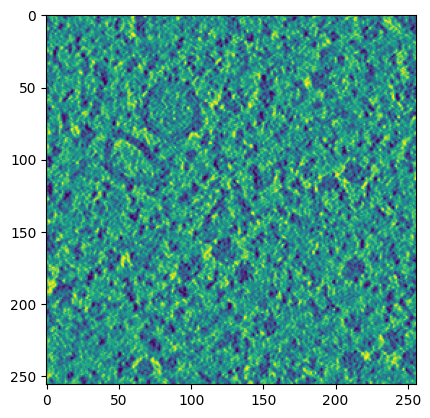

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(slice)

In [ ]:
model = lgs2.NN1_models[0]
model.eval()

Unet(
  (encoder): ResNetEncoder(
    (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track

In [ ]:
import torch
import torch.nn
x = torch.unsqueeze( torch.unsqueeze( torch.from_numpy(slice), dim=0) , dim=0).float().to("cuda:0")
X=model(x)
SM_func = torch.nn.Softmax(dim=1)
pred_probs_slice = SM_func(X)

In [ ]:
pred_probs_slice.shape

torch.Size([1, 3, 256, 256])

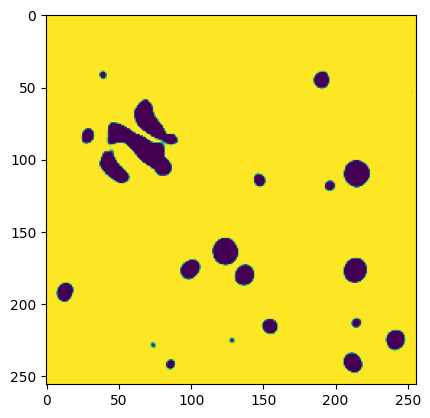

In [ ]:
plt.imshow(pred_probs_slice.detach().cpu().numpy()[0,0,:,:])

OK

## Check nn1_predict_slices_along_axis_1

In [ ]:
probs0, lbls0 = lgs2.predict_nn1_slices_along_axis_1(datavols_norm_list0[0], axis=0)

In [ ]:
NV=napari.Viewer()
NV.add_image(val_data)
NV.add_image(probs0, name="pred probs")

Assistant skips harvesting pyclesperanto as it's not installed.


<Image layer 'pred probs' at 0x1c149906610>

OK

## Check NN1_predict

In [ ]:
import tempfile
from pathlib import Path
tempdir_pred= tempfile.TemporaryDirectory()
path_out_results = Path(tempdir_pred.name)
path_out_results

WindowsPath('C:/Users/LUIS-W~1/AppData/Local/Temp/tmpjwi65c1h')

In [ ]:
res_pd = lgs2.predict_nn1(datavols_norm_list0, path_out_results)

Check results in temporary folder

In [ ]:
# cleanup
del(tempdir_pred)

: 

## Check full `predict()`

In [8]:
pred_res = lgs2.predict(val_data_l)

2024-06-29 21:11:18,653 — root — INFO — predict_from_data_list:1355 — predict_from_data_list()
2024-06-29 21:11:18,653 — root — INFO — normalise_volumes:1289 — normalise_volumes()
2024-06-29 21:11:18,654 — root — INFO — get_func_from_data_vol_norm_process_str:1276 — get_func_from_data_vol_norm_process_str()
2024-06-29 21:11:18,654 — root — INFO — get_func_from_data_vol_norm_process_str:1277 — data_vol_norm_process_str:mean_stdev_3
2024-06-29 21:11:18,655 — root — INFO — normalise_volumes:1296 — Normalising data.
2024-06-29 21:11:18,655 — root — INFO — normalise_voldata_to_stdev_3:196 — normalise_voldata_to_stdev_3()
2024-06-29 21:11:18,902 — root — INFO — predict_from_data_list:1368 — tempdir_pred_path:C:\Users\LUIS-W~1\AppData\Local\Temp\tmpjtcc8d9y
2024-06-29 21:11:18,903 — root — INFO — predict_nn1:780 — predict_NN1()
2024-06-29 21:11:18,904 — root — INFO — predict_nn1:791 — Data to predict iset:0
2024-06-29 21:11:18,905 — root — INFO — predict_nn1:797 — Volume to be rotated by 0 de

In [9]:
import napari
NV=napari.Viewer()
NV.add_image(val_data)
NV.add_labels(val_labels_gnd, name="lbls gnd")
NV.add_labels(pred_res[0], name="pred lbls")

Assistant skips harvesting pyclesperanto as it's not installed.


<Labels layer 'pred lbls' at 0x21934251e10>

OK